<a href="https://colab.research.google.com/github/qudn/Tabular-AL/blob/main/d_ALT_u%2Br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tabpfn scikit-learn pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
import pandas as pd

# Load the dataset
# You can replace this with the path to your dataset if you have a different one
try:
    df = pd.read_csv('adult.csv')
except FileNotFoundError:
    # If the file is not found locally, download from a public source (UCI Machine Learning Repository)
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data -O adult.csv
    df = pd.read_csv('adult.csv', header=None)
    # The adult.data file does not have headers, so we add column names manually
    df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                  'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                  'hours-per-week', 'native-country', 'class']

display(df.head())

--2025-08-01 03:23:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘adult.csv’

adult.csv               [     <=>            ]   3.79M  3.21MB/s    in 1.2s    

2025-08-01 03:24:00 (3.21 MB/s) - ‘adult.csv’ saved [3974305]



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Handle missing values (represented by '?')
df = df.replace(' ?', np.nan)
df = df.dropna()

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Encode categorical features
categorical_cols = X.select_dtypes(include='object').columns
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

# Split data into training (for active learning) and testing
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create an initial labeled set and an unlabeled pool from the training data
initial_labeled_size = 100
X_labeled_initial, X_unlabeled_pool, y_labeled_initial, y_unlabeled_pool = train_test_split(
    X_train_full, y_train_full, test_size=len(X_train_full) - initial_labeled_size, random_state=42, stratify=y_train_full
)

print(f"Initial labeled set size: {len(X_labeled_initial)}")
print(f"Unlabeled pool size: {len(X_unlabeled_pool)}")
print(f"Test set size: {len(X_test)}")

Initial labeled set size: 100
Unlabeled pool size: 24029
Test set size: 6033


In [4]:
from tabpfn import TabPFNClassifier

# Initialize TabPFN model
# device="cpu" can be used if a GPU is not available
tabpfn_model = TabPFNClassifier(device='cuda') # Changed device to 'cuda'

In [5]:
from sklearn.metrics import accuracy_score

# --- Baseline TabPFN (without Active Learning) ---
# Train TabPFN on the initial labeled dataset
tabpfn_model.fit(X_labeled_initial, y_labeled_initial)

# Evaluate on the test set
y_pred_baseline = tabpfn_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print(f"Baseline TabPFN Accuracy (initial data only): {baseline_accuracy:.4f}")

# --- Active Learning with Uncertainty Sampling ---

# Keep track of labeled and unlabeled data for active learning
X_labeled_al = X_labeled_initial.copy()
y_labeled_al = y_labeled_initial.copy()
X_unlabeled_al = X_unlabeled_pool.copy()
y_unlabeled_al = y_unlabeled_pool.copy()

# Number of iterations and samples to query in each iteration
n_iterations = 10
n_query_samples = 50

accuracy_history_uncertainty = [baseline_accuracy] # Start with baseline accuracy

print("\nStarting Active Learning with Uncertainty Sampling...")

for i in range(n_iterations):
    print(f"Iteration {i+1}/{n_iterations}")

    # Train the model on the current labeled data
    tabpfn_model.fit(X_labeled_al, y_labeled_al)

    # Get predicted probabilities for the unlabeled pool
    # TabPFN can sometimes return probabilities directly, or you might need to use predict_proba
    # Check TabPFN documentation for how to get probabilities if predict_proba is not available or works differently
    try:
        unlabeled_probs = tabpfn_model.predict_proba(X_unlabeled_al)
    except AttributeError:
        print("TabPFNClassifier does not have predict_proba. This active learning strategy requires probability estimates.")
        break # Exit loop if probabilities cannot be obtained

    # Calculate uncertainty (e.g., least confidence or margin sampling)
    # For least confidence, we take 1 - max(probability)
    uncertainty = 1 - np.max(unlabeled_probs, axis=1)

    # Select the most uncertain samples
    query_indices = np.argsort(uncertainty)[-n_query_samples:]

    # Get the selected samples and their true labels from the original unlabeled pool
    X_query = X_unlabeled_al.iloc[query_indices]
    y_query = y_unlabeled_al.iloc[query_indices] # Get corresponding labels from the full unlabeled set

    # Add queried samples to the labeled set
    X_labeled_al = pd.concat([X_labeled_al, X_query])
    y_labeled_al = pd.concat([y_labeled_al, y_query])

    # Remove queried samples from the unlabeled pool
    X_unlabeled_al = X_unlabeled_al.drop(X_unlabeled_al.index[query_indices])
    y_unlabeled_al = y_unlabeled_al.drop(y_unlabeled_al.index[query_indices])


    # Evaluate the model on the test set after adding new samples
    y_pred_al = tabpfn_model.predict(X_test)
    current_accuracy = accuracy_score(y_test, y_pred_al)
    accuracy_history_uncertainty.append(current_accuracy)

    print(f"Accuracy after iteration {i+1}: {current_accuracy:.4f}")
    print(f"Labeled set size: {len(X_labeled_al)}, Unlabeled pool size: {len(X_unlabeled_al)}")

print("\nActive Learning with Uncertainty Sampling Finished.")

(…)fn-v2-classifier-finetuned-zk73skhh.ckpt:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

Baseline TabPFN Accuracy (initial data only): 0.8245

Starting Active Learning with Uncertainty Sampling...
Iteration 1/10
Accuracy after iteration 1: 0.8245
Labeled set size: 150, Unlabeled pool size: 23979
Iteration 2/10
Accuracy after iteration 2: 0.8281
Labeled set size: 200, Unlabeled pool size: 23929
Iteration 3/10
Accuracy after iteration 3: 0.8357
Labeled set size: 250, Unlabeled pool size: 23879
Iteration 4/10
Accuracy after iteration 4: 0.8158
Labeled set size: 300, Unlabeled pool size: 23829
Iteration 5/10
Accuracy after iteration 5: 0.8377
Labeled set size: 350, Unlabeled pool size: 23779
Iteration 6/10
Accuracy after iteration 6: 0.8407
Labeled set size: 400, Unlabeled pool size: 23729
Iteration 7/10
Accuracy after iteration 7: 0.8412
Labeled set size: 450, Unlabeled pool size: 23679
Iteration 8/10
Accuracy after iteration 8: 0.8430
Labeled set size: 500, Unlabeled pool size: 23629
Iteration 9/10
Accuracy after iteration 9: 0.8415
Labeled set size: 550, Unlabeled pool size

In [6]:
from sklearn.metrics import accuracy_score

# --- Baseline TabPFN (without Active Learning) ---
# Train TabPFN on the initial labeled dataset
tabpfn_model.fit(X_labeled_initial, y_labeled_initial)

# Evaluate on the test set
y_pred_baseline = tabpfn_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print(f"Baseline TabPFN Accuracy (initial data only): {baseline_accuracy:.4f}")

# --- Active Learning with Uncertainty Sampling ---

# Keep track of labeled and unlabeled data for active learning
X_labeled_al = X_labeled_initial.copy()
y_labeled_al = y_labeled_initial.copy()
X_unlabeled_al = X_unlabeled_pool.copy()
y_unlabeled_al = y_unlabeled_pool.copy()

# Number of iterations and samples to query in each iteration
n_iterations = 10
n_query_samples = 50

accuracy_history_uncertainty = [baseline_accuracy] # Start with baseline accuracy

print("\nStarting Active Learning with Uncertainty Sampling...")

for i in range(n_iterations):
    print(f"Iteration {i+1}/{n_iterations}")

    # Train the model on the current labeled data
    tabpfn_model.fit(X_labeled_al, y_labeled_al)

    # Get predicted probabilities for the unlabeled pool
    # TabPFN can sometimes return probabilities directly, or you might need to use predict_proba
    # Check TabPFN documentation for how to get probabilities if predict_proba is not available or works differently
    try:
        unlabeled_probs = tabpfn_model.predict_proba(X_unlabeled_al)
    except AttributeError:
        print("TabPFNClassifier does not have predict_proba. This active learning strategy requires probability estimates.")
        break # Exit loop if probabilities cannot be obtained

    # Calculate uncertainty (e.g., least confidence or margin sampling)
    # For least confidence, we take 1 - max(probability)
    uncertainty = 1 - np.max(unlabeled_probs, axis=1)

    # Select the most uncertain samples
    query_indices = np.argsort(uncertainty)[-n_query_samples:]

    # Get the selected samples and their true labels from the original unlabeled pool
    X_query = X_unlabeled_al.iloc[query_indices]
    y_query = y_unlabeled_al.iloc[query_indices] # Get corresponding labels from the full unlabeled set

    # Add queried samples to the labeled set
    X_labeled_al = pd.concat([X_labeled_al, X_query])
    y_labeled_al = pd.concat([y_labeled_al, y_query])

    # Remove queried samples from the unlabeled pool
    X_unlabeled_al = X_unlabeled_al.drop(X_unlabeled_al.index[query_indices])
    y_unlabeled_al = y_unlabeled_al.drop(y_unlabeled_al.index[query_indices])


    # Evaluate the model on the test set after adding new samples
    y_pred_al = tabpfn_model.predict(X_test)
    current_accuracy = accuracy_score(y_test, y_pred_al)
    accuracy_history_uncertainty.append(current_accuracy)

    print(f"Accuracy after iteration {i+1}: {current_accuracy:.4f}")
    print(f"Labeled set size: {len(X_labeled_al)}, Unlabeled pool size: {len(X_unlabeled_al)}")

print("\nActive Learning with Uncertainty Sampling Finished.")

Baseline TabPFN Accuracy (initial data only): 0.8245

Starting Active Learning with Uncertainty Sampling...
Iteration 1/10
Accuracy after iteration 1: 0.8245
Labeled set size: 150, Unlabeled pool size: 23979
Iteration 2/10
Accuracy after iteration 2: 0.8281
Labeled set size: 200, Unlabeled pool size: 23929
Iteration 3/10
Accuracy after iteration 3: 0.8357
Labeled set size: 250, Unlabeled pool size: 23879
Iteration 4/10
Accuracy after iteration 4: 0.8158
Labeled set size: 300, Unlabeled pool size: 23829
Iteration 5/10
Accuracy after iteration 5: 0.8377
Labeled set size: 350, Unlabeled pool size: 23779
Iteration 6/10
Accuracy after iteration 6: 0.8407
Labeled set size: 400, Unlabeled pool size: 23729
Iteration 7/10
Accuracy after iteration 7: 0.8412
Labeled set size: 450, Unlabeled pool size: 23679
Iteration 8/10
Accuracy after iteration 8: 0.8430
Labeled set size: 500, Unlabeled pool size: 23629
Iteration 9/10
Accuracy after iteration 9: 0.8415
Labeled set size: 550, Unlabeled pool size

In [7]:
import random

# --- Active Learning with Random Sampling ---

# Reset labeled and unlabeled data for random sampling
X_labeled_random = X_labeled_initial.copy()
y_labeled_random = y_labeled_initial.copy()
X_unlabeled_random = X_unlabeled_pool.copy()
y_unlabeled_random = y_unlabeled_pool.copy()

accuracy_history_random = [baseline_accuracy] # Start with baseline accuracy

print("\nStarting Active Learning with Random Sampling...")

for i in range(n_iterations):
    print(f"Iteration {i+1}/{n_iterations}")

    # Train the model on the current labeled data
    tabpfn_model.fit(X_labeled_random, y_labeled_random)

    # Select random samples from the unlabeled pool
    # Ensure we don't try to query more samples than available
    n_query = min(n_query_samples, len(X_unlabeled_random))
    if n_query == 0:
        print("Unlabeled pool is empty. Stopping random sampling.")
        break

    query_indices_random = random.sample(range(len(X_unlabeled_random)), n_query)

    # Get the selected samples and their true labels
    X_query_random = X_unlabeled_random.iloc[query_indices_random]
    y_query_random = y_unlabeled_random.iloc[query_indices_random]

    # Add queried samples to the labeled set
    X_labeled_random = pd.concat([X_labeled_random, X_query_random])
    y_labeled_random = pd.concat([y_labeled_random, y_query_random])

    # Remove queried samples from the unlabeled pool
    X_unlabeled_random = X_unlabeled_random.drop(X_unlabeled_random.index[query_indices_random])
    y_unlabeled_random = y_unlabeled_random.drop(y_unlabeled_random.index[query_indices_random])

    # Evaluate the model on the test set after adding new samples
    y_pred_random = tabpfn_model.predict(X_test)
    current_accuracy_random = accuracy_score(y_test, y_pred_random)
    accuracy_history_random.append(current_accuracy_random)

    print(f"Accuracy after iteration {i+1}: {current_accuracy_random:.4f}")
    print(f"Labeled set size: {len(X_labeled_random)}, Unlabeled pool size: {len(X_unlabeled_random)}")

print("\nActive Learning with Random Sampling Finished.")


Starting Active Learning with Random Sampling...
Iteration 1/10
Accuracy after iteration 1: 0.8245
Labeled set size: 150, Unlabeled pool size: 23979
Iteration 2/10
Accuracy after iteration 2: 0.8298
Labeled set size: 200, Unlabeled pool size: 23929
Iteration 3/10
Accuracy after iteration 3: 0.8299
Labeled set size: 250, Unlabeled pool size: 23879
Iteration 4/10
Accuracy after iteration 4: 0.8356
Labeled set size: 300, Unlabeled pool size: 23829
Iteration 5/10
Accuracy after iteration 5: 0.8321
Labeled set size: 350, Unlabeled pool size: 23779
Iteration 6/10
Accuracy after iteration 6: 0.8369
Labeled set size: 400, Unlabeled pool size: 23729
Iteration 7/10
Accuracy after iteration 7: 0.8377
Labeled set size: 450, Unlabeled pool size: 23679
Iteration 8/10
Accuracy after iteration 8: 0.8377
Labeled set size: 500, Unlabeled pool size: 23629
Iteration 9/10
Accuracy after iteration 9: 0.8414
Labeled set size: 550, Unlabeled pool size: 23579
Iteration 10/10
Accuracy after iteration 10: 0.842

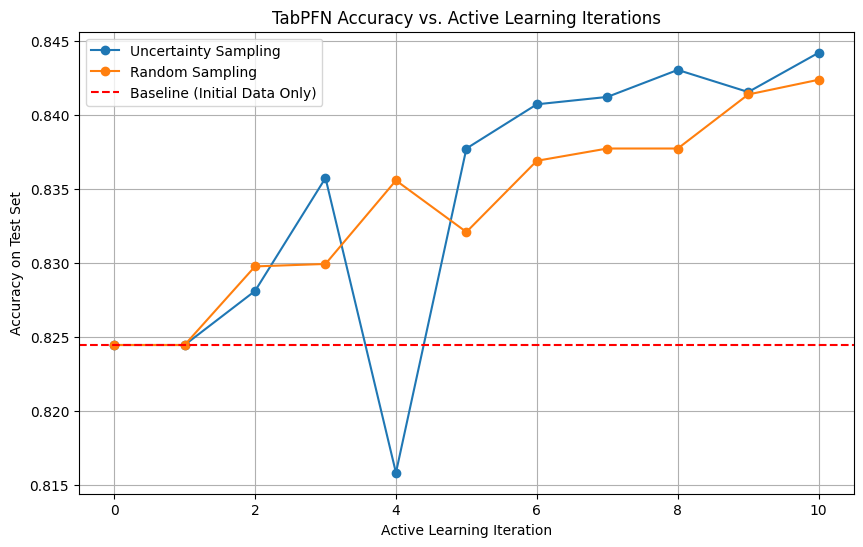

In [8]:
import matplotlib.pyplot as plt

# Plot the accuracy history for each strategy
plt.figure(figsize=(10, 6))

plt.plot(range(len(accuracy_history_uncertainty)), accuracy_history_uncertainty, marker='o', linestyle='-', label='Uncertainty Sampling')
plt.plot(range(len(accuracy_history_random)), accuracy_history_random, marker='o', linestyle='-', label='Random Sampling')

# Add baseline accuracy as a horizontal line
plt.axhline(y=baseline_accuracy, color='r', linestyle='--', label='Baseline (Initial Data Only)')

plt.xlabel('Active Learning Iteration')
plt.ylabel('Accuracy on Test Set')
plt.title('TabPFN Accuracy vs. Active Learning Iterations')
plt.legend()
plt.grid(True)
plt.show()